<a href="https://colab.research.google.com/github/byronkamal/data_science/blob/master/Titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Checklist**
1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo
6. Avaliação

## 1. Definição do problema


## 2. Obtenção dos dados
[Os dados são disponilizados pelo Kaggle](https://www.kaggle.com/c/titanic/data) foram divididos em 2 grupos: 
- <p align='justify'>Dados de treinamento <i>(train.csv)</i>: essa dados servem para construir o modelo de machine learning. Nesse dataset há features sobre os passageiros e é informado se ele sobreviveu ou não.</p>
- <p align='justify'>Dados de teste <i>(test.csv)</i>: nesse dataset há dados que não foram "vistos" pelo modelo de machine learning e é em cima deles que a predição é feita avaliação do modelo. Aqui **não** é informado se o passageiro sobreviveu ou não.</p>

<p align='justify'>Para facilitar, os dados já estão disponíveis nessa mesma pasta do notebook.</p>

In [9]:
# importar os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos no notebook
# %matplotlib inline

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


# verificando as dimensões do DataFrame
print("Variáveis(colunas):\t{}\nEntradas(linhas):\t{}".format(train.shape[1], train.shape[0]))

Variáveis(colunas):	12
Entradas(linhas):	891


## 3. Exploração dos Dados

<p align='justify'> A Exploração dos dados é uma parte importante dentro de Data
Science, pois aqui é realizada a análise das variáveis. Realizaremos a seguir alguns procedimentos como definir a váriavel alvo (target), dicionário de dados, visualização e correlação entre os dados. Esses procedimentos ajudam na análise dos dados. 
</p>

<p align='justify'> 
Como estamos trabalhando com Aprendizado Supervisionado, é necessário que exista uma váriavel alv, que no nosso caso é <i>Survived</i>. 
</p>

<br/>

**Vamos primeiramente identificar qual é o tipo de cada variável para depois montarmos nosso Dicionário de Dados**


In [0]:
# identificar o tipo de dados cada variável 
display(train.dtypes)

# ver as primeiras tuplas do dataset de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dicionário de Dados
| Variável | Descrição | Key | Tipo de Dado |Tipo de variável|
|--|--|--|--|--|
|PassengerId|Número de indetificação de cada passageiro|-|int|Númérica Discreta - **Chave Primária**|
|Survived|informa se o passageiro sobreviveu ou não ao desastre|0 = Não, 1 = Sim|int|Númerica Discreta - **Alvo**|
|Pclass|Classe do bilhete|1 = 1ª classe, 2 = 2ª classe, 3 = 3º classe|int|Númerica Discreta|
|SibSp|Número de irmão/côjuges abordo no Titanic|-|int|Númerica Discreta|
|Parch|Número de pais/crianças abordos no Titanic|-|int|Númerica Discreta|
|Age|Idade do passageiro|-|float|Númerica Contínua|
|Fare|Preço da passagem|-|float|Númerica Contínua|
|Name|Nome do passageiro|-|object|Categórica|
|Sex|Sexo do passageiro|-|object|Categórica|
|Ticket|Número da passagem|-|object|Categórica|
|Cabin|Número da cabine do passageiro|C = Cherbourg, Q = Queenstown, S = Southampton|object|Categórica|
|Embarked|Porto de embarque do passageiro|-|object|Categórica|

### Valores faltantes

<p align='justify'> É necessário sabermos quais são os valores faltantes em nosso dataset e para a seguir é possível ver a quantidade em números e a porcetagem desses valores: </p>

In [0]:
# quantidade de informações faltantes
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [0]:
# porcentagem das informações faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

Temos ao total **891 entradas** e é possível constatar que **Cabin** é a que possui a maior quantidade de dados faltantes, com 687 valores ausentes ou, em porcentagem, mais de 77%. Temos em seguida as colunas **Age** que possui 177 valores ausentes, quase 20%, e **Embarked** com 2 também ausentes representando pouco mais de 2%.

### Análise estatística dos dados

In [0]:
# ver distribuição estatística
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3df99b74e0>,
      dtype=object)

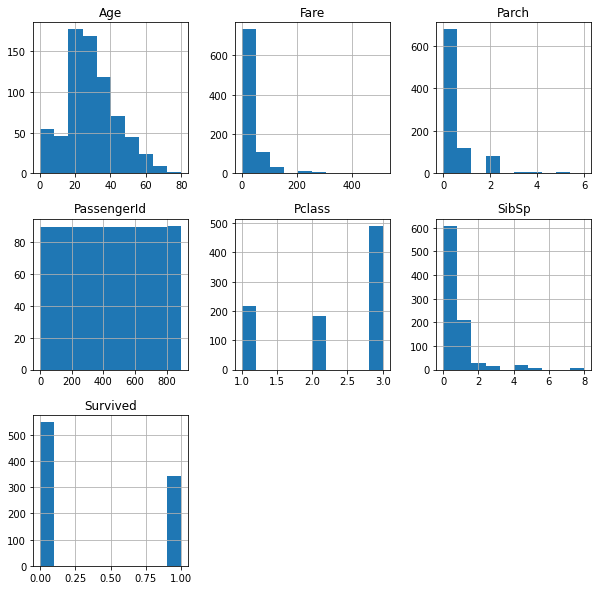

In [0]:
# histograma das variáveis númericas
train.hist(figsize=(10,10))

<br/>

**Já que nosso objetivo é construir um modelo para medir a chance de sobrevivência dos passageiros do Tianic, então é importante termos algumas análises dos dados relacionados à coluna Survived**

In [0]:
# probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


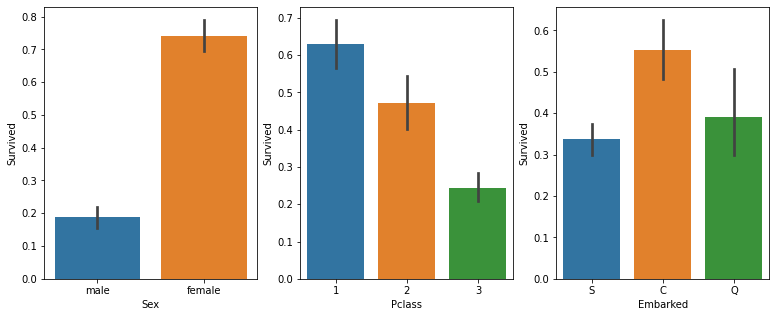

In [0]:
# Gráficos para Survived vs Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(13,5))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

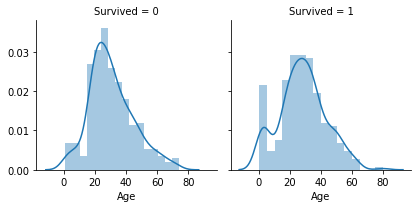

In [0]:
# influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

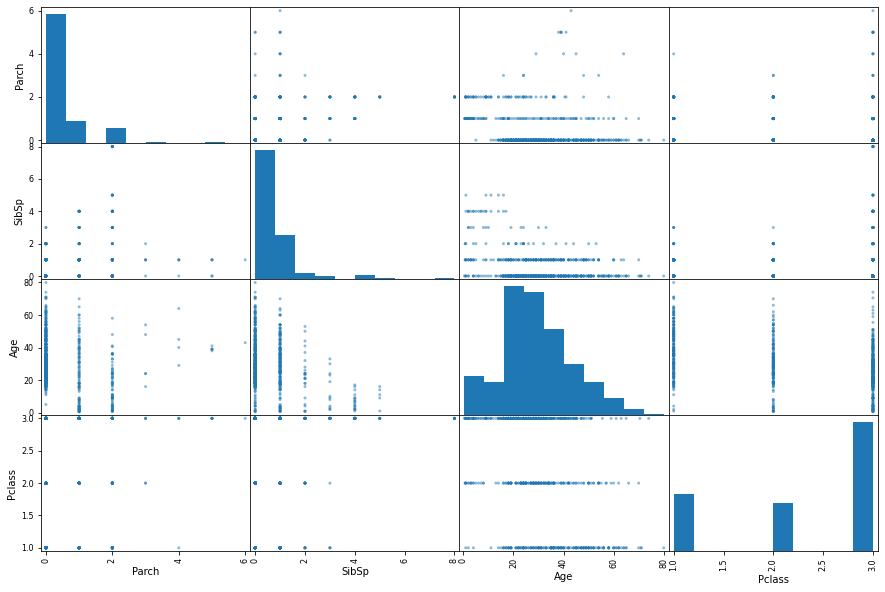

In [0]:
# plotar uma scatter matrix (matriz de dispersão)
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

In [0]:
# ver correlações entre as variavéis numéricas com pandas
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


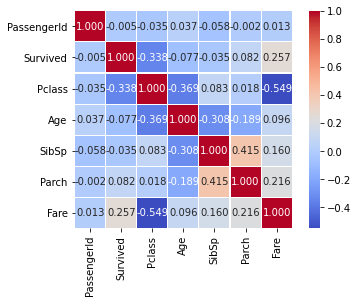

In [0]:
# ver correlações entre as variavéis numéricas com seaborn
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.3f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

## 4. Preparação dos dados

**A seguir vamos concatenar os datasets de treino e teste**

A concatenação dos datasets ficilita a etapa de preparação dos dados, pois é mais fácil fazer todas as etapas em somente um DataFrame do que em dois. No final do processo, esse único conjunto de dados pode ser separada novemente entre treino e teste.

In [3]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
y_train = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


**Seleção de features**

Após a exploração e análise dos dados algumas variáveis podem não servir para nada ou não terem significância para o modelo de Machine Learning.

No nosso dataset, iremos retirar as variáveis <i>['PassangerId', 'Name','Ticket', 'Cabin'],</i> pois **aparentemente** elas não irão ter tanto peso no nosso modelo.
Assim, ficamos com as variáveis <i>['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'].</i>

In [0]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


<br />

**Tratamentos dos dados faltantes**

A seguir vamos analisar como faremos o tratamentos dos dados faltantes (<i>missing values</i>). Temos duas abordagens mais comuns:
- Preencher esses valores arbitrariamente (média, mediana, valor mais frequente);
- Excluir a linha inteira.

In [5]:
# ver quantidade de valores faltantes
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Para idade e tarifa vamos subtituir com a mediana e para porto de embarque vamos colocar o valor com maior frequência.

In [0]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

<br />

**Preparação das Variáveis Categóricas**

No nosso dataset ainda existem variáveis que são do tipo categórica, porém nosso modelo só trabalha com variáveis do tipo numérica. Então, será aplicado a conversão de 'Sex' para {'male': 0, 'female': '} e para 'Embarked' será aplicado o conceito de variáveis dummies (assumem apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica).

In [12]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


<br />

**Recuperando os dasets de treino e teste**

Após a preparação do dataset para o modelo, vamos divir o <i>df_merged</i> em <i>train</i>train <i>teste</i> novamente.

In [0]:
# dividir datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]